In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [32]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000201EF968188>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000201E9D45B48>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000201F0486688>)

In [5]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
# this is multiclassification ... output is from 0 to 9 so we need output one hot encoded.. can be done while loading dataset

In [9]:
import numpy as np
from matplotlib import pyplot as plt

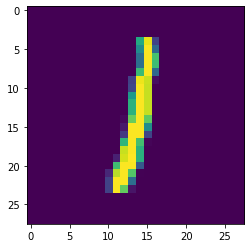

In [10]:
first_image=mnist.train.images[4]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
# model we are contructing...

# weight layer 784    256    256   10 

# bias layer   256    256    10    

In [12]:
with tf.Session() as sess:
    print(tf.random_normal([1,2]).eval())     # create random array

[[ 0.19045609 -0.42086086]]


In [13]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [14]:
tf.trainable_variables()          # only above 6 are trainables... optimizer will change there values in model

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [15]:
def forward_propagation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return(output)

In [16]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)

In [18]:
predictions=tf.argmax(pred,1)                        # gives index with max val in row , 1 is for row wise
true_labels=tf.argmax(y,1)             
correct_predictions=tf.equal(predictions,true_labels)

In [19]:
pred_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],
                                       feed_dict={x:mnist.train.images,y:mnist.train.labels})
pred_eval,labels,correct_pred

(array([9, 9, 7, ..., 9, 9, 9], dtype=int64),
 array([7, 3, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [20]:
correct_pred.sum()

3867

### Lets optimize algo

In [21]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [22]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)

In [24]:
# cross entropy                 sigma -ylog(h)-(1-y)log(1-h)

In [31]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) #will take mean of all values...

In [26]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [27]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [28]:
for i in range(25):
    c,_=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels}) 
    print(c)

1686.7174
1123.8475
842.9405
616.02246
447.90735
320.74362
249.68443
211.92633
189.7556
173.22804
156.37975
138.69205
122.56753
110.54528
102.68139
97.410034
92.959366
88.90309
85.2779
81.882744
78.30262
74.3202
70.23933
66.56705
63.598553


In [29]:
predictions=tf.argmax(pred,1)                   
correct_labels=tf.argmax(y,1)             
correct_predictions=tf.equal(predictions,correct_labels)
pred_eval,correct_pred=sess.run([predictions,correct_predictions],
                                feed_dict={x:mnist.train.images,y:mnist.train.labels})
correct_pred.sum()/55000

0.8667090909090909

### Batch gradient desecent...               
##### more optimization , stochastic regression

In [30]:
# 100 batches sooo 55000 data will be of 550 each...

In [33]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [34]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)

In [36]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) #will take mean of all values...

In [37]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [38]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [39]:
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y}) 
        total_cost+=c
    print(total_cost)

24381.77611708641
4377.345872759819
2371.040146792712
1597.64520641428
1238.6135417291864
1224.8525654277926
1069.5646142725177
950.1585012834903
832.9566579408449
788.4648754738531
666.3928540590806
628.9274397712809
563.6283224804827
464.43869552721657
397.7013237790753
415.4845966997617
374.80402712853703
399.5033047775346
325.28070337904876
278.33385497615757
337.5430633275022
235.49081928464477
195.02402723942305
184.93627471577256
180.02326945787578


In [40]:
predictions=tf.argmax(pred,1)                   
correct_labels=tf.argmax(y,1)             
correct_predictions=tf.equal(predictions,correct_labels)
pred_eval,correct_pred=sess.run([predictions,correct_predictions],
                                feed_dict={x:mnist.train.images,y:mnist.train.labels})
correct_pred.sum()/55000

0.9814363636363637

In [41]:
# 86 % accuracy to 98% accuracy....